<a href="https://colab.research.google.com/github/lagosmanuel/ML-ANN/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2 - Inteligencia Artificial 2024 🤖

### Comisión 5 - Manuel Lagos


---



# Importar las librerías necesarias

In [ ]:
# Importar las librerías
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
from keras import Sequential, layers, Input

from pandas.api.types import is_numeric_dtype
from math import floor, isnan


In [ ]:
# Descargar los dataset
!wget datasets.zip https://www.dropbox.com/scl/fi/am9s76wadm288tvjtqpzu/datasets.zip\?rlkey\=8x2ilyok703ja1sp6nwdgs9kp\&st\=530mkbke\&dl\=0 -O datasets.zip
!unzip -o datasets.zip
!rm datasets.zip

--2024-10-22 22:57:32--  http://datasets.zip/
Resolving datasets.zip (datasets.zip)... 104.21.3.233, 172.67.131.81, 2606:4700:3036::6815:3e9, ...
Connecting to datasets.zip (datasets.zip)|104.21.3.233|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://dan.com/buy-domain/datasets.zip [following]
--2024-10-22 22:57:32--  https://dan.com/buy-domain/datasets.zip
Resolving dan.com (dan.com)... 104.96.220.50, 104.96.220.145, 2600:1408:10::b833:65cb, ...
Connecting to dan.com (dan.com)|104.96.220.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasets.zip’

datasets.zip            [ <=>                ]  55.21K  --.-KB/s    in 0.04s   

2024-10-22 22:57:33 (1.46 MB/s) - ‘datasets.zip’ saved [56538]

--2024-10-22 22:57:33--  https://www.dropbox.com/scl/fi/am9s76wadm288tvjtqpzu/datasets.zip?rlkey=8x2ilyok703ja1sp6nwdgs9kp&st=530mkbke&dl=0
Resolving www.dropbox.com (www.dropbox.com)..

# Carga y análisis de datos

In [ ]:
# Cargar el dataset
df = pd.read_csv("football_train.csv")
print(f"El conjunto tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El conjunto tiene 5320 filas y 22 columnas.


In [ ]:
df.sample(10)

,Team,Goals,Shots,Shots_on_target,Corners,Fouls_commited,Offsides,Yellow_cards,Red_cards,Corners_received,...,Shots_on_target_received,Goals_received,Played_Matches,Season,City,Stadium,Stadium_capacity,Ownership,Dominant_team,Position
3966,Tottenham,33.0,192,78,71,171,0,27.0,1.0,77,...,57,15,15,2122,London,Tottenham Hotspur Stadium,62850,ENIC Group,not_dominant,NaN
3693,Aston Villa,18.0,106,49,50,85,0,10.0,0.0,32,...,46,14,8,2021,Birmingham,Villa Park,42749,Nassef Sawiris and Wes Edens,not_dominant,media-tabla
4108,Chelsea,8.0,81,32,33,55,0,10.0,0.0,25,...,24,9,5,2122,London,Stamford Bridge,41837,Todd Boehly,not_dominant,top-4
4948,Newcastle,18.0,130,49,60,108,0,NaN,0.0,41,...,26,6,9,2223,Newcastle upon Tyne,St James' Park,52305,Saudi Public Investment Fund,not_dominant,top-4
279,Tottenham,31.0,222,85,80,164,0,NaN,0.0,59,...,42,9,14,1617,London,Tottenham Hotspur Stadium,62850,ENIC Group,dominant,top-4
2574,Norwich,20.0,328,98,129,272,0,NaN,3.0,203,...,156,56,29,1920,Norwich,Carrow Road,27359,Delia Smith & Michael Wynn-Jones,not_dominant,descenso
5307,Brentford,43.0,270,114,108,233,0,NaN,1.0,158,...,140,32,26,2223,London,Brentford Community Stadium,17250,Matthew Benham,not_dominant,media-tabla
2229,Fulham,19.0,306,99,109,292,0,NaN,1.0,161,...,163,63,26,1819,London,Craven Cottage,24500,Shahid Khan,not_dominant,descenso
2286,Southampton,6.0,70,25,33,86,0,8.0,1.0,58,...,41,12,7,1920,Southampton,St Mary's,32505,Sport Republic,not_dominant,media-tabla
131,Swansea,22.0,166,62,94,183,0,27.0,NaN,87,...,87,30,18,1617,Swansea,Liberty Stadium,21088,Jason Levien and Steve Kaplan,not_dominant,media-tabla


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Team                      5320 non-null   object 
 1   Goals                     4856 non-null   float64
 2   Shots                     5320 non-null   int64  
 3   Shots_on_target           5320 non-null   int64  
 4   Corners                   5320 non-null   int64  
 5   Fouls_commited            5320 non-null   int64  
 6   Offsides                  5320 non-null   int64  
 7   Yellow_cards              2157 non-null   float64
 8   Red_cards                 5029 non-null   float64
 9   Corners_received          5320 non-null   int64  
 10  Fouls_received            5320 non-null   int64  
 11  Shots_received            5320 non-null   int64  
 12  Shots_on_target_received  5320 non-null   int64  
 13  Goals_received            5320 non-null   int64  
 14  Played_M

In [ ]:
# Buscar atributos que no sean de tipo numérico
for attr in df.columns:
  if (not is_numeric_dtype(df[attr])):
    print(f"El atributo {attr} no es de tipo numérico, es de tipo {df[attr].dtype}.")

El atributo Team no es de tipo numérico, es de tipo object.
El atributo City no es de tipo numérico, es de tipo object.
El atributo Stadium no es de tipo numérico, es de tipo object.
El atributo Ownership no es de tipo numérico, es de tipo object.
El atributo Dominant_team no es de tipo numérico, es de tipo object.
El atributo Position no es de tipo numérico, es de tipo object.


In [ ]:
# Buscar atributos que tengan valores nulos
for attr in df.columns:
  na_count = df[attr].isna().sum()
  if (na_count > 0):
    print(f"Para el atributo {attr} hay {na_count} ejemplos nulos.")

Para el atributo Goals hay 464 ejemplos nulos.
Para el atributo Yellow_cards hay 3163 ejemplos nulos.
Para el atributo Red_cards hay 291 ejemplos nulos.
Para el atributo Position hay 272 ejemplos nulos.


# Procesamiento de los datos

In [ ]:
# Mapeo los valores del atributo Dominant_team a un número
dominant_values = df["Dominant_team"].unique()
print(f"Los valores del atributo Dominant_team son: {dominant_values}")

map_dominant = {
    "very_dominant": 0,
    "dominant": 1,
    "not_dominant": 2,
}

df["Dominant_team"] = df["Dominant_team"].map(map_dominant)

Los valores del atributo Dominant_team son: ['not_dominant' 'dominant' '0' 'very_dominant']


In [ ]:
# Mapeo los valores del atributo Position a un número
position_values = df["Position"].unique()
print(f"Los valores del atributo Position son: {position_values}")

map_position = {
    "top-4": 0,
    "5-a-7": 1,
    "media-tabla": 2,
    "descenso": 3
}

df["Position"] = df["Position"].map(map_position).astype("Int64")

Los valores del atributo Position son: ['media-tabla' nan '5-a-7' 'descenso' 'top-4']


In [ ]:
# Reemplazo los Goles con valor 0 por None
df["Goals"] = df["Goals"].replace(0, None)

In [ ]:
# Elimino las columnas que considero que no son relevantes
df.drop(columns=["City"], inplace=True, errors="ignore")
df.drop(columns=["Stadium"], inplace=True, errors="ignore")
df.drop(columns=["Stadium_capacity"], inplace=True, errors="ignore")
df.drop(columns=["Ownership"], inplace=True, errors="ignore")
df.drop(columns=["Offsides"], inplace=True, errors="ignore")

In [ ]:
# Función para rellenar los valores faltantes de la columna 'attr' en el dataframe 'df'
def fill_attr(df, attr):
  for index, row in df[df[attr].isna()].iterrows():
    values = []
    team = row["Team"]
    season = row["Season"]

    prev_row = df.iloc[index-1] if index-1 > 0 else None
    next_row = df.iloc[index+1] if index+1 < len(df) else None

    if (prev_row is not None and not pd.isna(prev_row[attr])
        and prev_row["Team"] == team and prev_row["Season"] == season):
      values.append(prev_row[attr])

    if (next_row is not None and not pd.isna(next_row[attr])
        and next_row["Team"] == team and next_row["Season"] == season):
      values.append(next_row[attr])

    if (values != []):
      df.at[index, attr] = floor(sum(values)/len(values))


In [ ]:
# Relleno los valores faltantes de las siguientes columnas:
fill_attr(df, "Goals")
fill_attr(df, "Position")
fill_attr(df, "Yellow_cards")
fill_attr(df, "Red_cards")
fill_attr(df, "Dominant_team")

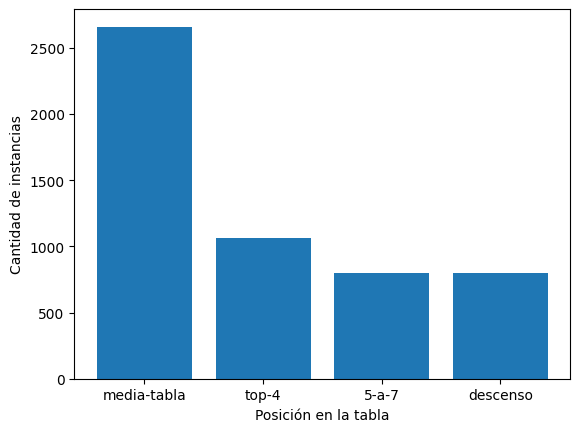

In [ ]:
# Distribución de los ejemplos (filas del dataset) para cada clase
map_position_inv = {v: k for k, v in map_position.items()}
position_counts = df["Position"].map(map_position_inv).value_counts()

# Crear el histograma
plt.bar(position_counts.index, position_counts.values)

# Agregar etiquetas y título
plt.xlabel("Posición en la tabla")
plt.ylabel("Cantidad de instancias")

# Mostrar el histograma
plt.show()

In [ ]:
# Elimino la columna Team
df.drop(columns=["Team"], inplace=True, errors="ignore")

In [ ]:
# Elimino los ejemplos que hayan quedado con valores nulos
df.dropna(inplace=True)

In [ ]:
# Valores de la columna target.
Y = df["Position"].values

# Porción del dataframe con los atributos.
X = df.drop(columns = ["Position"])

In [ ]:
# Porcentajes para datos de validación y test.
test_size = 0.1
val_size = 0.1

# La función train_test_split separa los datos (X, Y) en dos porciones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size, random_state = 69)

# Nos guardamos los nombres de los atributos para más adelante
feature_names = X_train.columns.values[:-1]

print("Datos de entrenamiento:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_train.shape[0], X_train.shape[1]))
print("Datos de validación:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}\n".format(X_val.shape[0], X_val.shape[1]))
print("Datos de test:\n\tCantidad de ejemplos (filas): {}\n\tCantidad de atributos (columnas): {}".format(X_test.shape[0], X_test.shape[1]))

Datos de entrenamiento:
	Cantidad de ejemplos (filas): 4212
	Cantidad de atributos (columnas): 15

Datos de validación:
	Cantidad de ejemplos (filas): 469
	Cantidad de atributos (columnas): 15

Datos de test:
	Cantidad de ejemplos (filas): 521
	Cantidad de atributos (columnas): 15


# Desarrollo de un Árbol de Decisión

In [ ]:
# Uso esto para buscar la mejor combinación de hiper-parámetros
max_depth_range = [2, 4, 6, 7, 8]
min_samples_leaf_range = [1, 2, 3, 4, 5]
criterion_range = ["gini", "entropy", "log_loss"]
max_features = ["sqrt", "log2"]
class_weights = dict(enumerate(compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)))

tree_params = dict(
  criterion = criterion_range,
  max_depth = max_depth_range,
  min_samples_leaf = min_samples_leaf_range,
)

model_dt_cv = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5)
model_dt_cv = model_dt_cv.fit(X_train, y_train)

param_grid = pd.concat([pd.DataFrame(model_dt_cv.cv_results_["params"]), pd.DataFrame(model_dt_cv.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
param_best = model_dt_cv.best_params_
score_best = model_dt_cv.best_score_

print(f"> Buscar la configuración de los hiper-parámetros:")
print(param_grid)
print(f"El mejor score obtenido es: {score_best}")
print(f"La combinación de parámetros es: {param_best}")
print(f"El peso de las clases es: {class_weights}")


> Buscar la configuración de los hiper-parámetros:
   criterion  max_depth  min_samples_leaf  Accuracy
0       gini          2                 1  0.643637
1       gini          2                 2  0.643637
2       gini          2                 3  0.643637
3       gini          2                 4  0.643637
4       gini          2                 5  0.643637
..       ...        ...               ...       ...
70  log_loss          8                 1  0.766620
71  log_loss          8                 2  0.767570
72  log_loss          8                 3  0.765908
73  log_loss          8                 4  0.766621
74  log_loss          8                 5  0.760923

[75 rows x 4 columns]
El mejor score obtenido es: 0.7697074975415819
La combinación de parámetros es: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
El peso de las clases es: {0: 1.2872860635696821, 1: 1.6740858505564389, 2: 0.4955294117647059, 3: 1.6453125}


In [ ]:
# Acá elegí los parámetros a mano
model_dt = DecisionTreeClassifier(
    criterion = "log_loss",
    max_depth = 8,
    min_samples_leaf = 1
)

# Se ajusta el AD con los datos de entrenamiento
model_dt = model_dt.fit(X_train, y_train)

In [ ]:
# Reporte de Clasififación para los datos de Validación
predictions = model_dt.predict(X_val)
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       115
         1.0       0.61      0.53      0.56        70
         2.0       0.75      0.92      0.83       214
         3.0       0.87      0.56      0.68        70

    accuracy                           0.78       469
   macro avg       0.78      0.70      0.73       469
weighted avg       0.79      0.78      0.77       469



In [ ]:
# Reporte de Clasififación para los datos de Test
predictions = model_dt.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79       119
         1.0       0.57      0.47      0.52        83
         2.0       0.78      0.95      0.86       256
         3.0       0.95      0.65      0.77        63

    accuracy                           0.79       521
   macro avg       0.80      0.70      0.73       521
weighted avg       0.79      0.79      0.78       521



# Desarrollo de una Red Neuronal Artificial

In [ ]:
# Onehot encoder
enc = OneHotEncoder()

# El encoder define un mapeo para las etiquetas.
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1)).toarray()
y_val_enc = enc.transform(y_val.reshape(-1, 1)).toarray() # Aquí usar transform.
y_test_enc = enc.transform(y_test.reshape(-1, 1)).toarray() # Aquí usar transform.

In [ ]:
num_features = X_train.shape[1]
num_outputs = y_train_enc.shape[1]

def define_model(neurons, hidden_layers, activation, learning_rate):
    model = Sequential()

    # Capa de entrada de la red
    model.add(Input(shape=(num_features, )))

    # Capas ocultas
    for i in range(hidden_layers):
      model.add(layers.Dense(neurons, activation = activation))

    # Capa de salida de la red
    model.add(layers.Dense(num_outputs, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    return model

In [ ]:
neurons = 10
hidden_layers = 4
activation = "silu"
learning_rate = 1e-3
eps = 100
bs = 32

model_nn = define_model(neurons, hidden_layers, activation, learning_rate)
model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534 (2.09 KB)

 Trainable params: 534 (2.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
result = model_nn.fit(X_train, y_train_enc, batch_size = bs, epochs = eps, validation_data=(X_val, y_val_enc))

Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3741 - loss: 42.0849 - val_accuracy: 0.5181 - val_loss: 1.8973
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5241 - loss: 1.7914 - val_accuracy: 0.5672 - val_loss: 1.5062
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5884 - loss: 1.3446 - val_accuracy: 0.5778 - val_loss: 1.3106
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6200 - loss: 1.1669 - val_accuracy: 0.5991 - val_loss: 1.1334
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6190 - loss: 1.0467 - val_accuracy: 0.6375 - val_loss: 1.0156
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6471 - loss: 0.9171 - val_accuracy: 0.6397 - val_loss: 0.9231
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6473 - loss: 0.9652 - val_accuracy: 0.6226 - val_loss: 0.8931
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6669 - loss: 0.8434 - val_acc

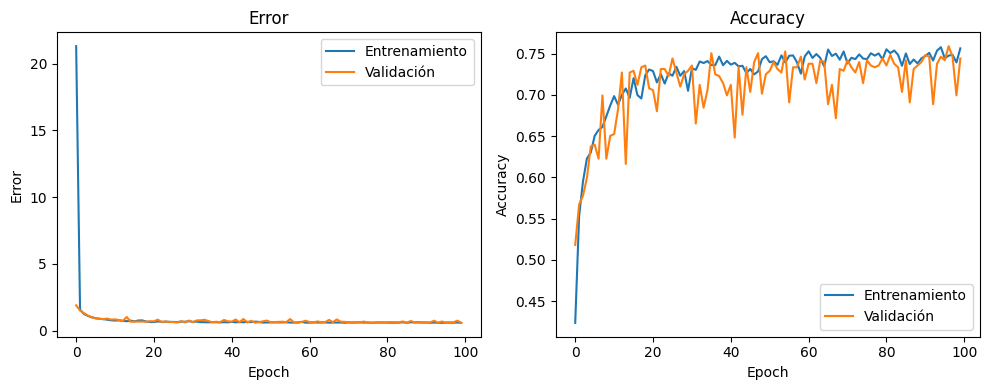

In [ ]:
#Grafico para Error y Accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Error
ax1.plot(result.history['loss'], label='Entrenamiento')
ax1.plot(result.history['val_loss'], label='Validación')
ax1.set_title('Error')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Error')
ax1.legend()

# Accuracy
ax2.plot(result.history['accuracy'], label='Entrenamiento')
ax2.plot(result.history['val_accuracy'], label='Validación')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Reporte de Clasificación sobre el conjunto de Validación
predictions = model_nn.predict(X_val)

# Reporte de clasificación
print(classification_report(np.argmax(y_val_enc, axis = 1),
                            np.argmax(predictions, axis = 1),
                            target_names = ["media-tabla", "top-4", "5-a-7", "descenso"]))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

 media-tabla       0.82      0.86      0.84       115
       top-4       0.57      0.34      0.43        70
       5-a-7       0.73      0.89      0.80       214
    descenso       0.80      0.51      0.63        70

    accuracy                           0.74       469
   macro avg       0.73      0.65      0.67       469
weighted avg       0.74      0.74      0.73       469



In [ ]:
# Reporte de Clasificación sobre el conjunto de Test
predictions = model_nn.predict(X_test)

# Reporte de clasificación
print(classification_report(np.argmax(y_test_enc, axis = 1),
                            np.argmax(predictions, axis = 1),
                            target_names = ["media-tabla", "top-4", "5-a-7", "descenso"]))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

 media-tabla       0.76      0.84      0.80       119
       top-4       0.68      0.33      0.44        83
       5-a-7       0.77      0.88      0.82       256
    descenso       0.66      0.60      0.63        63

    accuracy                           0.75       521
   macro avg       0.72      0.66      0.67       521
weighted avg       0.74      0.75      0.73       521



# Predicción de los datos no etiquetados

In [ ]:
df_test = pd.read_csv("football_test.csv")
df_train = pd.read_csv("football_train.csv")
teams = df_test["Team"]

In [ ]:
# Reemplazo los valores 0 por None
df_test["Shots"] = df_test["Shots"].replace(0, None)
df_test["Red_cards"] = df_test["Red_cards"].replace(0, None)

In [ ]:
# Buscar atributos que tengan valores nulos
for attr in df_test.columns:
  na_count = df_test[attr].isna().sum()
  if (na_count > 0):
    print(f"Para el atributo {attr} hay {na_count} ejemplos nulos.")

Para el atributo Shots hay 3 ejemplos nulos.
Para el atributo Yellow_cards hay 8 ejemplos nulos.
Para el atributo Red_cards hay 2 ejemplos nulos.


In [ ]:
# Función para rellenar los valores faltantes de la columna 'attr' en el dataframe 'df'
def fill_attr(df_train, df_test, attr):
  for index, row in df_test[df_test[attr].isna()].iterrows():
    team = row["Team"] if ((row["Team"]) != "Luton") else "Sheffield United" # como no hay datos del Luton en df_train, uso los un equipo similar.
    mean = df_train.loc[(df_train["Team"]==team)][attr].mean()
    if (not isnan(mean)):
      df_test.at[index, attr] = floor(mean)

In [ ]:
fill_attr(df_train, df_test, "Shots")
fill_attr(df_train, df_test, "Yellow_cards")
fill_attr(df_train, df_test, "Red_cards")

In [ ]:
df_test.drop(columns=["City"], inplace=True, errors="ignore")
df_test.drop(columns=["Stadium"], inplace=True, errors="ignore")
df_test.drop(columns=["Stadium_capacity"], inplace=True, errors="ignore")
df_test.drop(columns=["Ownership"], inplace=True, errors="ignore")
df_test.drop(columns=["Offsides"], inplace=True, errors="ignore")
df_test.drop(columns=["Team"], inplace=True, errors="ignore")

In [ ]:
df_test["Dominant_team"] = df_test["Dominant_team"].map(map_dominant)

In [ ]:
df_test

,Goals,Shots,Shots_on_target,Corners,Fouls_commited,Yellow_cards,Red_cards,Corners_received,Fouls_received,Shots_received,Shots_on_target_received,Goals_received,Played_Matches,Season,Dominant_team
0,91.0,657,227,256,391,62.0,2.0,113,407,322,87,29,38,2324,0
1,76.0,514,190,233,413,35.0,2.0,161,483,454,181,61,38,2324,2
2,54.0,542,185,236,506,80.0,0,214,396,532,197,67,38,2324,2
3,56.0,473,172,185,384,88.0,2.0,219,434,548,187,65,38,2324,2
4,55.0,562,208,206,414,89.0,3.0,167,461,467,167,62,38,2324,2
5,41.0,433,142,181,427,71.0,7.0,233,368,614,246,78,38,2324,2
6,77.0,548,215,203,445,104.0,3.0,191,464,556,188,63,38,2324,2
7,57.0,204,169,178,456,69.0,2.0,198,440,459,155,58,38,2324,2
8,40.0,507,162,185,457,34.0,1.0,238,373,538,171,51,38,2324,2
9,55.0,500,178,212,384,35.0,4.0,189,385,523,196,61,38,2324,2


In [ ]:
# Etiquetas
dt_attr = "Árbol de Decisión"
nn_attr = "Red Neuronal Artificial"
rr_attr = "Resultados Oficiales"

# Obtener las predicciones
dt_results = model_dt.predict(df_test).astype("int64")
nn_results = np.argmax(model_nn.predict(df_test), axis=-1)

# Datos Oficiales de la Premier
or_results = [0, 0, 2, 2, 2, 3, 1, 2, 2, 2, 0, 3, 0, 2, 1, 2, 3, 1, 2, 2]

# Calcular el Accuracy
dt_acc = accuracy_score(dt_results, or_results)
nn_acc = accuracy_score(nn_results, or_results)

print(f"El acurracy para el árbol es: {dt_acc}")
print(f"El acurracy para la red es: {nn_acc}")

# Mapear la posición de número a string
position_map_inv = {v: k for k, v in map_position.items()}
dt_results = np.array([position_map_inv.get(i) for i in dt_results])
nn_results = np.array([position_map_inv.get(i) for i in nn_results])
or_results = np.array([position_map_inv.get(i) for i in or_results])

# Creare el Dataframe final
df_final = pd.DataFrame(columns=["Team", dt_attr, nn_attr])
df_final["Team"]  = teams
df_final[dt_attr] = dt_results
df_final[nn_attr] = nn_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El acurracy para el árbol es: 0.85
El acurracy para la red es: 0.9


In [ ]:
df_final

,Team,Árbol de Decisión,Red Neuronal Artificial
0,Arsenal,top-4,top-4
1,Aston Villa,top-4,5-a-7
2,Bournemouth,media-tabla,media-tabla
3,Brentford,media-tabla,media-tabla
4,Brighton,media-tabla,media-tabla
5,Burnley,descenso,descenso
6,Chelsea,5-a-7,5-a-7
7,Crystal Palace,media-tabla,media-tabla
8,Everton,media-tabla,media-tabla
9,Fulham,media-tabla,media-tabla


In [ ]:
file_name = "football_final.csv"
!rm -f football_final.csv
df_final.to_csv(file_name, sep='\t')
print(f"Se creó el archivo {file_name} con los resultados!")

Se creó el archivo football_final.csv con los resultados!
